<a href="https://colab.research.google.com/github/pkams/bootcamp_IGTI/blob/master/desafio_modulo1_comentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Objetivo deste notebook é explicar questão a questão do primeiro desafio do 
# Bootcamp - Analista de Machine Learning, IGTI.

# Abordarei a forma mais simples e direta de resolução de cada questão, 
# visando explicar o conceito e a função utilizada.   

# Primeiramente, devemos importar as bibliotecas a serem utilizadas. 
# Como algumas questões pedem algoritmos especificos, vou abordar a utilização
# de cada biblioteca especifica dentro de cada questão.

In [99]:
# a maneira padrão de importação é:
# import + "biblioteca" + as + "nome que representará a bilioteca"

# Duas bibliotecas que sempre serão importadas são:
import pandas as pd # biblioteca para manipulação dos dados
import numpy as np # biblioteca de funções matematicas em geral

# Para visualização, temos diversas opções, as duas mais comuns são:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Estou utilizando o colab para criação do notebook, então fiz o upload manualmente
# do arquivo. 
# Na aba lateral esquerda, clicar na pastinha(files), ir em upload e fazer
# o upload manual do arquivo.
# Ou então rodar o código abaixo:

In [11]:
from google.colab import files
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod (1).csv


In [0]:
# Com o arquivo já upado, devemos abri-lo e associá-lo a um dataframe do pandas, 
# possibilitando que façamos as edições necessárias.

df = pd.read_csv('comp_bikes_mod.csv')

In [0]:
# Com o arquivo associado ao termo 'df' podemos visualizar o conteudo:

In [160]:
# .head() permite ver as 5 primeiras linhas do dataframe, para entendimento da
# estrutura.
# podemos passar outros valores para ver mais ou menos linhas
# .head(3) ou .head(11) por exemplo.

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [17]:
# As questões serão feitas fora de ordem pois elas são embaralhadas no desafio.

# Questão:
# No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

# Resolução:
# Os atributos são as colunas, as váriaveis que definem o dataset (season,temp,hum...)
# As instancias são os exemplos que temos, ou seja as LINHAS (linha 1, linha 2...)
# Temos então este formato: (instancias, atributos)
# uma maneira simples de observar o num de linhas e colunas é:

df.shape

(17379, 17)

In [18]:
# Questão:
# Quantos tipos diferentes de dados existem no dataset?

# Resolução:
# Para responder este, é preciso verificar quais os tipos de dados temos no df.
# A maneira mais simples é utilizando df.dtypes, que dará os tipos de cada coluna.

df.dtypes

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
hr            float64
holiday       float64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [0]:
# Temos então dois tipos de dados no dataset: object e float64. 

In [24]:
# Questão:
# Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?

# Resolução:
# Para responder essa podemos utilizar uma série de funções:

# df.isna().sum() dará a quantidade de nulos em cada coluna

df.isna().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [26]:
# Para pegar a porcentagem de uma coluna especifica precisamos chamar a função
# isnan para pegar o total de NaN's e então dividir pelo total geral.

# df['temp'] -> seleciona apenas a coluna temp

df['temp'].isna().sum()

1738

In [34]:
# Para pegar o tamanho da coluna podemos usar a função len() ou novamente o .shape()

len(df['temp']) 

17379

In [36]:
# Dividindo então:
# Quantidade de nulos / Quantidade total

df['temp'].isna().sum() / len(df['temp'])

0.10000575407100523

In [0]:
# Lembrando que existem bibliotecas e funções que fazem esse calculo diretamente,
# neste caso estou usando os metódos ''na mão'' que mais facilmente atingem o resultado
# visando o aprendizado das principais funções envolvidas.

In [0]:
# Questao:
# Após retirar as linhas que contém valores nulos para a coluna "dteday", 
# passamos a contar com quantas instancias e atributos, respectivamente?

# Resolução: 
# Para retirar os NaN podemos usar .dropna()
# E novamente aplicar o .shape

In [0]:
# É uma boa prática salvar o dataframe com outro nome, caso seja necessário voltar
# e utilizar os dados inicias em algum outro momento.
# subset permite selecionar de qual colunas queremos dropar os NaN, neste caso
# foi pedido a dteday na questão.

df_drop = df.dropna(subset=['dteday'])

# Obs: Neste caso irá dropar todas as linhas que tiverem NaN no subset 'dteday'
# Poderiamos dropar as COLUNAS sinalizando um axis=1 dentro da funcao .dropna()

In [43]:
# Novamente, (instancias, atributos)
df_drop.shape

(15641, 17)

In [0]:
# Questão:
# Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
# Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". 
# Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:

# Resolução:
# Nesta questão não fala sobre colocar o atributo 'cnt' na matriz de correlação,
# mas presume-se que devemos adicioná-la para poder comparar com as outras.

# Para gerar a matriz de correlacao podemos fazer df.corr()

In [57]:
df_drop.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.407970,0.866207,0.488959,-0.008643,0.014597,-0.001126,-0.010626,-0.020270,0.141681,0.141808,0.007919,-0.072738,0.167456,0.288272,0.282132
season,0.407970,1.000000,-0.005610,0.830177,-0.004903,-0.006846,0.005788,0.011555,-0.013153,0.311273,0.319559,0.146984,-0.149802,0.123779,0.173305,0.179190
yr,0.866207,-0.005610,1.000000,-0.010337,-0.006261,0.007763,-0.008526,-0.000958,-0.026142,0.040857,0.037290,-0.082335,-0.010422,0.141733,0.258888,0.252729
mnth,0.488959,0.830177,-0.010337,1.000000,-0.005681,0.021196,0.018991,-0.004235,0.002774,0.202203,0.210337,0.158109,-0.126643,0.074406,0.127226,0.129162
hr,-0.008643,-0.004903,-0.006261,-0.005681,1.000000,0.009332,-0.010738,-0.003002,-0.023388,0.142102,0.136946,-0.277403,0.140474,0.303261,0.371388,0.391391
holiday,0.014597,-0.006846,0.007763,0.021196,0.009332,1.000000,-0.099102,-0.250450,-0.018945,-0.031273,-0.037606,-0.008809,0.008267,0.014519,-0.050193,-0.036150
weekday,-0.001126,0.005788,-0.008526,0.018991,-0.010738,-0.099102,1.000000,0.038821,0.004393,-0.004478,-0.011512,-0.035510,0.011014,0.025301,0.020142,0.021396
workingday,-0.010626,0.011555,-0.000958,-0.004235,-0.003002,-0.250450,0.038821,1.000000,0.050468,0.053113,0.055287,0.017469,-0.010926,-0.300811,0.130360,0.028170
weathersit,-0.020270,-0.013153,-0.026142,0.002774,-0.023388,-0.018945,0.004393,0.050468,1.000000,-0.101245,-0.105254,0.418574,0.025729,-0.152335,-0.118396,-0.141622
temp,0.141681,0.311273,0.040857,0.202203,0.142102,-0.031273,-0.004478,0.053113,-0.101245,1.000000,0.988102,-0.069887,-0.016022,0.458735,0.329653,0.405867


In [58]:
# Na matriz acima ja seriapossivel observar TODAS as relações entre atributos.
# Entretanto é pedido para selecionarmos alguns.
# O processo é o mesmo, porém selecionando as váriaveis:
# df['variavel'].corr() ou df[['variavel1', 'variavel2',....]].corr()

df_drop[["season", "temp", "atemp", "hum", "windspeed", 'cnt']].corr()

,season,temp,atemp,hum,windspeed,cnt
season,1.000000,0.311273,0.319559,0.146984,-0.149802,0.179190
temp,0.311273,1.000000,0.988102,-0.069887,-0.016022,0.405867
atemp,0.319559,0.988102,1.000000,-0.054224,-0.058803,0.403810
hum,0.146984,-0.069887,-0.054224,1.000000,-0.289859,-0.323409
windspeed,-0.149802,-0.016022,-0.058803,-0.289859,1.000000,0.091747
cnt,0.179190,0.405867,0.403810,-0.323409,0.091747,1.000000


In [59]:
# Pela matriz acima podemos ver a linha e coluna de intersecção dos atributos 'hum' e 'cnt'
# Ou então selecionamos na mão:

df_drop[["season", "temp", "atemp", "hum", "windspeed", 'cnt']].corr('pearson')['cnt']['hum']

-0.3234094870662662

In [0]:
# Abaixo de .4 costuma-se considerar baixa correlação, como temos um valor negativo então
# BAIXA CORRELAÇÃO NEGATIVA é a resposta.

In [89]:
# Questão:

# Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
# Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

# Podemos acessar diferentes medidas estatisticas diretamente:
# .mean(), .std(), .min(), .max()...
# Como queremos da coluna TEMP acessamos ela diretamente através de:
# dataframe['coluna']

df_drop['temp'].mean()

0.4969259206597582

In [90]:
# Questão:
# Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
# Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?

df_drop['windspeed'].std()

0.12230930508286268

In [96]:
# Poderiamos usar a função .describe() para acessar diretamente todos os dados estatisticos das colunas.

df_drop.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


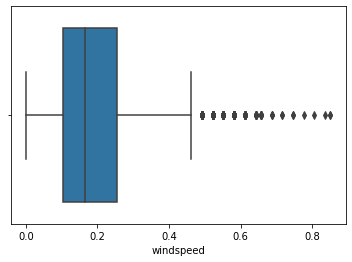

In [102]:
# Questão
# Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
# Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?

# Podemos ver o boxplot de várias maneiras, as mais simples e diretas são:

sns.boxplot(df_drop['windspeed'])

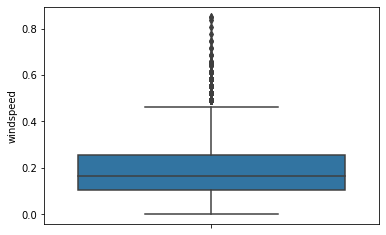

In [105]:
sns.boxplot(df_drop['windspeed'], orient='v')

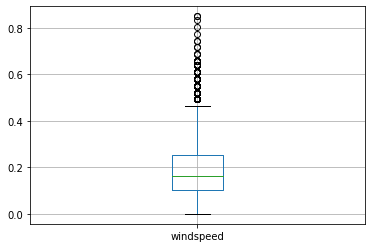

In [123]:
df_drop[['windspeed']].boxplot()

# Utilizamos dois [[]] aqui pois estamos acessando um método dataframe.

In [131]:
df_drop['windspeed'].isna().sum()

1559

In [0]:
# Resolução:
# Neste caso percebemos diversos outliers, baseando-se no plot do gráfico.

In [0]:
# São diversos os métodos que permitem plotar os graficos, diversas bibliotecas permitem:
# matplotlib, seaborn, plotly, altair...
# A maioria delas permitem os mesmos tipos de plots, mudando apenas a funcionalidade individual de cada uma. 
# Algumas são mais interativas, outras permitem animações e edições em tempo real.

In [141]:
# Questão:
# Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
# Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?

# Podemos responder esta questão de diferentes formas:

# Diretamente verificando os valores unicos(ignorando NaN)
df_drop['season'].nunique() 
# Observando os valores únicos => numero de categorias que serãocriadas

4

In [0]:
# usando o .astype() para mudar o tipo da váriavel para categórica
df_season = df_drop['season'].astype('category')

In [150]:
# E então verificando:
df_season.dtypes

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False)

In [155]:
# Aqui não é muito intuitivo, mas podemos chegar as categorias com:
list(df_season.cat.categories)

[1.0, 2.0, 3.0, 4.0]

In [0]:
# Questão:

# Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
# Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

# Resolução:
# Para transformar em datetime utilizamos: pd.to_datetime()
# Devemos passar o argumento format='' com o formato da data.
# Existem códigos para passar o formato da data.
# Nossas datas estão no formato: ano4digitos - mes - dia
# temos então:
# pd.to_datetime(coluna, formato)

df['dteday'] = pd.to_datetime(df['dteday'],format='%Y-%m-%d')

In [169]:
# Verificamos com dtypes:

df.dtypes

instant              float64
dteday        datetime64[ns]
season               float64
yr                   float64
mnth                 float64
hr                   float64
holiday              float64
weekday              float64
workingday           float64
weathersit           float64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
dtype: object

In [170]:
# Para achar a ultima data de maneira simples é só aplicar o método .max() para ver o maior valor

df['dteday'].max()

Timestamp('2012-12-31 00:00:00')

In [0]:
# Questão:
# Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. 
# Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. 
# Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

# Resolução:
# Primeiramente temos que preencher os valores das colunas 'hum','cnt','casual' com os valores médios.
# Vamos entender primeiramente como acessar esses valores médios.]

# Primeiro, vamos salvar um dataframe novo APENAS com os valores das colunas que iremos utilizar:

df_med = df_drop[['hum', 'cnt', 'casual']]

In [67]:
# Podemos ver nosso dataframe:

df_med.head()

,hum,cnt,casual
1,0.80,40.0,8.0
2,0.80,32.0,5.0
3,0.75,13.0,3.0
4,0.75,1.0,0.0
5,0.75,1.0,0.0


In [68]:
# Para acessar as médias usamos novamente:

df_med.mean()

hum         0.627357
cnt       189.165850
casual     35.416317
dtype: float64

In [0]:
# Similar a função .dropna, podemos utilizar a função .fillna()
# Ela funciona passando dentro do () os valores que queremos substituir os NaN's.
# Neste caso passaremos o df_med.mean() que irá colocar a média de cada coluna nos NaN's de cada coluna.
# Salvamos novamente a váriavel df_med para aplicar o efeito do fillna.

df_med = df_med.fillna(df_med.mean())

In [77]:
# Verificamos a quantidade de NaN's:
df_med.isna().sum()

hum       0
cnt       0
casual    0
dtype: int64

In [81]:
# Para usarmos nosso modelo precisamos separá-lo em X e y:

# Váriaveis independentes
X = df_med[['hum', 'casual']]

# Visualizando
X.head()

,hum,casual
1,0.80,8.0
2,0.80,5.0
3,0.75,3.0
4,0.75,0.0
5,0.75,0.0


In [95]:
# Váriavel dependente
y = df_med['cnt']

y

1         40.0
2         32.0
3         13.0
4          1.0
5          1.0
         ...  
17373    122.0
17374    119.0
17375     89.0
17377     61.0
17378     49.0
Name: cnt, Length: 15641, dtype: float64

In [0]:
# Temos então nosso novo dataframe com as variaveis imputadas.
# Iremos então chamar a biblioteca para implementação da regressão linear
# Para todos os algoritmos de ML o funcionamento se dará nos seguintes passos:

# 1. Importação da Biblioteca
# 2. Instanciando o modelo
# 3. Fitando o modelo (criação do modelo)
# 4. Predição de novos valores
# 5. Avaliação com diferentes métricas

In [0]:
# Seguindo os passos acima:

In [85]:
# 1. Importação da Biblioteca

from sklearn.linear_model import LinearRegression

# 2. Instanciando o modelo

linreg = LinearRegression() 
# Aqui poderiamos setar os parametros caso fosse necessário
# Neste caso vamos apenas utilizar o modelo padrão

# 3. Fitando o modelo (criação do modelo)

linreg.fit(X,y) 
# Aqui o modelo foi criado, os cálculos de diminuição de função erro,
# Gradiente, e demais ''mágicas'' da matematica foram todas feitas por trás
# do código. A partir disto podemos utilizá-lo para prever novos valores.
# Abaixo aparecerá os parametros que foram setados automaticamente:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# 4. Predição de novos valores

linreg.predict(X)

# Aqui geramos resultados do nosso modelo prevendo os valores do próprio X.
# Se tivessemos um X novo poderia utiliza-lo aqui!

array([111.21425222, 104.5688863 , 105.12614851, ..., 191.89476367,
       146.22989168, 135.03725861])

In [88]:
# 5. Avaliação com diferentes métricas
# Aqui avaliamos com diferentes métricas a acurácia do modelo.
# No exercicio foi pedido o R2.

from sklearn.metrics import r2_score

# Queremos salvar o valor predito, então rodamos novamente:

ypred = linreg.predict(X)

# r2_score (assim como outras métricas), funciona no seguinte formato:
# função_métrica(yreal,ypredito)
r2_score(y,ypred)

0.4059859251122173

In [91]:
# Após esta explicação acima podemos aplicar o mesmo passo a passo para responder a 
# questão da árvore de decisão:

# Questão:
# Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). 
# Aplique a árvore de decisão como regressão. 
# Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

# 1. Importação da Biblioteca

from sklearn.tree import DecisionTreeRegressor

# 2. Instanciando o modelo

dtr = DecisionTreeRegressor()

# 3. Fitando o modelo (criação do modelo)

dtr.fit(X,y)

# 4. Predição de novos valores

ypred2 = dtr.predict(X)

# 5. Avaliação com diferentes métricas

r2_score(y,ypred2)

0.7098339715834964

In [0]:
# Notamos acima que o processo de implementação de ambos os algoritmos é exatamente o mesmo.
# Outros algoritmos também seguem o mesmo passo (ou praticamente o mesmo).
# A mudança entre eles seria os hiperparametros que passariamos no momento que instanciamos eles.
# Nas questões propostas a instrução foi utilizar default, portanto não passamos nenhum valor para eles.

In [94]:
# Questão:

# Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:
# Podemos ver nos exercicios anteriores, mas vamos mostrá-los novamente:

print('R2 da regressão linear: ', r2_score (y,ypred))
print('R2 da árvore de decisão: ', r2_score (y,ypred2))

R2 da regressão linear:  0.4059859251122173
R2 da árvore de decisão:  0.7098339715834964
